In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 
# !pip install numpy

# Models


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model

Graphs Packages


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Model evaluation packages 

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

# Model Selection Function

In [ ]:
def  best_model(X,y):
    
    #importing models from sklearn
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn import linear_model
    from sklearn.naive_bayes import GaussianNB
    
    from sklearn import metrics
    
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    
    #model declaration
    d_tree=DecisionTreeClassifier(criterion="entropy",random_state=10)
    
    knn= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
    
    logr = linear_model.LogisticRegression()
    
    naive = GaussianNB()

    #fitting data into models
    d_tree.fit(X_train,y_train)
    knn.fit(X_train,y_train)
    logr.fit(X_train,y_train)
    naive.fit(X_train, y_train)
    
    dt_pred=d_tree.predict(X_test)
    knn_pred=knn.predict(X_test)
    logr_pred=logr.predict(X_test)
    naive_pred=naive.predict(X_test)
    
    print("Decision Tree  model accuracy(in %):", metrics.accuracy_score(y_test, dt_pred)*100)
    print("k-nearest neighbours model accuracy(in %):", metrics.accuracy_score(y_test, knn_pred)*100)
    print("Logistic Regression model accuracy(in %):", metrics.accuracy_score(y_test, logr_pred)*100)
    print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, naive_pred)*100)
    


In [ ]:
# Foetal Heart Rate Best Model
dataset=pd.read_csv('/content/foetal_heartrate.csv')
X=dataset[['FHR1','FHR2','FHR3','FHR4','FHR5','FHR6','FHR7','FHR8']]
y=dataset[["res"]]
best_model(X,y)


In [ ]:
#contractions
dataset=pd.read_csv("/content/final_contractions.csv")
X=dataset.iloc[:,1:11]
y='phase1'
best_model(X,y)

In [ ]:
# pulse_BP Rate Best Model
dataset=pd.read_csv('/content/pulse_bp.csv')
target_var='res'
best_model(dataset,target_var)

# Fetel Heart Rate 

In [ ]:
#Decision Tree classifier
# from sklearn.tree import DecisionTreeClassifier
fhr_model=DecisionTreeClassifier(criterion="entropy",random_state=10)

df=pd.read_csv('./foetal_heartrate.csv')
#Training and Target Variables
X=df[['FHR1','FHR2','FHR3','FHR4','FHR5','FHR6','FHR7','FHR8']]
y=df[["res"]]

#splitting data for training and testing in 70-30 ratio
# ***from sklearn.model_selection import train_test_split***

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#fitting data into model
fhr_model.fit(X_train,y_train)

#Training and Testing acccuracy
dt_train_ac=fhr_model.score(X_train,y_train)
dt_test_ac=fhr_model.score(X_test,y_test)
print("Training acc  :"+str(dt_train_ac))
print('Testing acc   :'+str(dt_test_ac))

#Confusion Matrix
target_predict=fhr_model.predict(X_test)

# print(target_predict)



#classification_report
print(classification_report(y_test,target_predict))

input_predict=fhr_model.predict(X_train)






Training acc  :1.0
Testing acc   :1.0
['foetal distress' 'foetal distress' 'normal' ... 'foetal distress'
 'foetal distress' 'foetal distress']
                 precision    recall  f1-score   support

foetal distress       1.00      1.00      1.00     24969
         normal       1.00      1.00      1.00      5031

       accuracy                           1.00     30000
      macro avg       1.00      1.00      1.00     30000
   weighted avg       1.00      1.00      1.00     30000



# Contractions

In [ ]:
# Loading Dataset
odf=pd.read_csv('/content/final_contractions.csv')

#Training and Target Variables
input_var=odf.iloc[:,1:11]
target_var=odf[['phase1']]


# from sklearn.neighbors import KNeighborsClassifier

# cont_model = KNeighborsClassifier(n_neighbors=7)
cont_model=DecisionTreeClassifier(criterion="entropy",random_state=10)

# from sklearn.model_selection import train_test_split
#splitting data for training and testing in 70-30 ratio
X_train, X_test, y_train, y_test = train_test_split(input_var, target_var, test_size=0.3, random_state=42)


 
#fitting data into model    
cont_model.fit(X_train, y_train)

#Training and Testing acccuracy
print("Training acc  :"+str(cont_model.score(X_train,y_train)))
print('Testing acc   :'+str(cont_model.score(X_test,y_test)))

#Confusion Matrix
target_predict=cont_model.predict(X_test)
# pd.crosstab(y_test,target_predict)


#classification_report
print(classification_report(y_test,target_predict))

# input_predict=cont_model.predict(X_train)

Training acc  :1.0
Testing acc   :1.0
                 precision    recall  f1-score   support

        consult       1.00      1.00      1.00      1702
feotal distress       1.00      1.00      1.00       319
         normal       1.00      1.00      1.00       979

       accuracy                           1.00      3000
      macro avg       1.00      1.00      1.00      3000
   weighted avg       1.00      1.00      1.00      3000



BP and pulse prediction

In [ ]:
data=pd.read_csv("/content/pulse_bp.csv")

X=data.iloc[:,1:-1]
y=data['res']


bp_model=DecisionTreeClassifier(criterion="entropy",random_state=10)

# from sklearn.model_selection import train_test_split
#splitting data for training and testing in 70-30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


 
#fitting data into model    
bp_model.fit(X_train, y_train)

#Training and Testing acccuracy
print("Training acc  :"+str(bp_model.score(X_train,y_train)))
print('Testing acc   :'+str(bp_model.score(X_test,y_test)))

#Confusion Matrix
target_predict=bp_model.predict(X_test)


#classification_report
print(classification_report(y_test,target_predict))

# input_predict=cont_model.predict(X_train)



Training acc  :1.0
Testing acc   :1.0
              precision    recall  f1-score   support

     consult       1.00      1.00      1.00      1851
      normal       1.00      1.00      1.00      1149

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



Final_prediction

In [ ]:
data=pd.read_csv("/content/final .csv")

X=data.iloc[:,1:-1]
y=data['res']


final_model=DecisionTreeClassifier(criterion="entropy",random_state=10)

# from sklearn.model_selection import train_test_split
#splitting data for training and testing in 70-30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


 
#fitting data into model    
final_model.fit(X_train, y_train)

#Training and Testing acccuracy
print("Training acc  :"+str(final_model.score(X_train,y_train)))
print('Testing acc   :'+str(final_model.score(X_test,y_test)))

#Confusion Matrix
target_predict=final_model.predict(X_test)
# pd.crosstab(y_test,target_predict)


#classification_report
print(classification_report(y_test,target_predict))

# input_predict=cont_model.predict(X_train)



Training acc  :1.0
Testing acc   :0.9743589743589743
              precision    recall  f1-score   support

     CONSULT       0.93      1.00      0.97        14
          FD       1.00      1.00      1.00        22
      NORMAL       1.00      1.00      1.00         2
      PROLON       0.00      0.00      0.00         1

    accuracy                           0.97        39
   macro avg       0.73      0.75      0.74        39
weighted avg       0.95      0.97      0.96        39



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y.unique()

array(['FD', 'CONSULT', 'NORMAL', 'PROLON'], dtype=object)

final confusion matrix

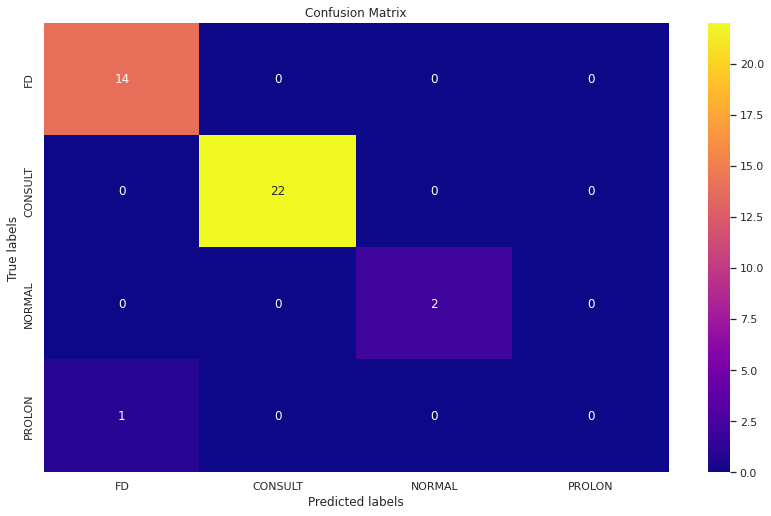

In [ ]:
cf_matrix=confusion_matrix(y_test, target_predict)

ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', ax=ax,cmap ='plasma');  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['FD', 'CONSULT', 'NORMAL', 'PROLON']); ax.yaxis.set_ticklabels(['FD', 'CONSULT', 'NORMAL', 'PROLON']);

# FHR Prediction

In [ ]:
#fhr graph
def fhr_graph(Fhr1,Fhr2,Fhr3,Fhr4,Fhr5,Fhr6,Fhr7,Fhr8):
  line=sns.lineplot(x=[30,60,90,120,150,180,210,240], y=[Fhr1,Fhr2,Fhr3,Fhr4,Fhr5,Fhr6,Fhr7,Fhr8],marker='o')
  line.set_title( "Fetel Heart Rate")
  line.set_xlabel( "Time-interval")
  line.set_ylabel('Fhr')
  line.set_xlim(0, 300)
  line.set_ylim(90,180) 

  line=sns.lineplot(x=[0,60,120,180,240,300],y=[120,120,120,120,120,120],color='red')
  line=sns.lineplot(x=[0,60,120,180,240,300],y=[160,160,160,160,160,160],color='red')

  print("the outcome of this graph is : "+str(fhr_model.predict([lists])))




#bp_pulse graph
def bp_pulse_graph(pulses,bp1,bp11,bp2,bp22):
  import matplotlib.pyplot as plt
  import seaborn as sns
  import pandas as pd

  fig, ax = plt.subplots(1, 1, figsize=(12, 6))
  sns.lineplot(x=[1,2,3,4,5,6,7,8], y=pulses,marker='o',ax=ax)
  ax.annotate('', xy=(2, bp1), xytext=(2, bp11),arrowprops=dict(arrowstyle='<->', facecolor='red'))
  ax.annotate('', xy=(8, bp2), xytext=(8, bp22),arrowprops=dict(arrowstyle='<->', facecolor='red'))

  plt.ylim(60,180)
  plt.xlim(0,10)

  plt.show()
  print("the outcome of this graph is : "+str(bp_model.predict([bp_pred_list])))

#cervix length graph
def cl_graph(r):
  import seaborn as sns
  import matplotlib.pyplot as plt
  line=sns.lineplot(x=[1,2,4,6,8],y=[cl1, cl1+1, cl1+2, cl1+3,cl1+4],color='blue', marker = 'o') #alert line
  line=sns.lineplot(x=[4,5,6,7,8,9,10], y=[4,5,6,7,8,9,10], color = 'red')
  line=sns.lineplot(x=[0,1,2,3,4,5,6], y=[4,5,6,7,8,9,10], color = 'red')
  line.set_title( "Cervix Length")
  line.set_xlabel( "Time-interval")
  line.set_ylabel('cl')

  sns.set(rc={'figure.figsize':(14,8.27)})
  plt.figure(figsize = (14, 8))
  line.set_xlim(0,10)
  line.set_ylim(4,10)
  # print("the outcome of this graph is : "+str(model.predict([[contractions]])))/

#contractions graph
def cont_graph(contractions,left1,time):
  tick_label = ['c1', 'c2', 'c3', 'c4', 'c5','c6','c7','c8']
  value = list(zip(contractions,time))
  colors = ['red' if i[0] <= 20 and i[1] <= 2 else 'blue' if (i[0] >= 20 and i[0] < 40) and (i[1] > 2 and i[1] <= 4) else 'green' for i in value]
  plt.bar(left1, time, tick_label = tick_label,width=0.9,color=colors)
  plt.ylim(0,10)
  plt.show()
  
  print("the outcome of this graph is : "+str(cont_model.predict([contractions])))
  


In [ ]:
lists = []
Fhr1=int(input("Enter FHR1: "))
if Fhr1 < 120 or Fhr1 > 160:
  print("Foetal Distress")
  fhr_op = 0
else:
  print("Normal, wait for progress.")
  lists.append(Fhr1)
  Fhr2=int(input("Enter FHR2: "))
  if Fhr2 < 120 or Fhr2 > 160:
    print("Foetal Distress")
  else:
    print("Normal, wait for progress.")
    lists.append(Fhr2)
    Fhr3=int(input("Enter FHR3: "))
    if Fhr3 < 120 or Fhr3 > 160:
      print("Foetal Distress")
    else:
      print("Normal, wait for progress.")
      lists.append(Fhr3)
      Fhr4=int(input("Enter FHR4: "))
      if Fhr4 < 120 or Fhr4 > 160:
        print("Foetal Distress")
      else:
        print("Normal, wait for progress.")
        lists.append(Fhr4)
        Fhr5=int(input("Enter FHR5: "))
        if Fhr5 < 120 or Fhr5 > 160:
          print("Foetal Distress")
        else:
          print("Normal, wait for progress.")
          lists.append(Fhr5)
          Fhr6=int(input("Enter FHR6: "))
          if Fhr6 < 120 or Fhr6 > 160:
            print("Foetal Distress")
          else:
            print("Normal, wait for progress.")
            lists.append(Fhr6)
            Fhr7=int(input("Enter FHR7: "))
            if Fhr7 < 120 or Fhr7 > 160:
              print("Foetal Distress")
            else:
                print("Normal, wait for progress.")
                lists.append(Fhr7)
                Fhr8=int(input("Enter FHR8: "))
                if Fhr8 < 120 or Fhr8 > 160:
                  print("Foetal Distress")
                else:
                  print("Normal, wait for progress.")
                  lists.append(Fhr8)
                  fhr_op = 1
  # print(fhr_op)


def pred(lists,fhr_pred):
    k=fhr_model.predict([lists])
    k1=[0,1]
    k2=["Foetal Distress",'Normal']
    if k in k1:
        # print(k2[k1.index(k)]) 
        fhr_pred=k1[k1.index(k)]  
    # else:
    #     print("Enter Valid Inputs")
fhr_pred=0
pred(lists,fhr_pred)
  
 



Enter FHR1: 124
Normal, wait for progress.
Enter FHR2: 130
Normal, wait for progress.
Enter FHR3: 135
Normal, wait for progress.
Enter FHR4: 140
Normal, wait for progress.
Enter FHR5: 140
Normal, wait for progress.
Enter FHR6: 145
Normal, wait for progress.
Enter FHR7: 145
Normal, wait for progress.
Enter FHR8: 150
Normal, wait for progress.
1


TypeError: ignored

In [ ]:
def pred(lists,fhr_pred):
    k=fhr_model.predict([lists])
    k1=[0,1]
    k2=["Foetal Distress",'Normal']
    if k in k1:
        # print(k2[k1.index(k)]) 
        fhr_pred=k1[k1.index(k)]  
    # else:
    #     print("Enter Valid Inputs")
fhr_pred=0
pred(lists,fhr_pred)

In [ ]:
11# c
# ccc
# 11#fluids
def fluid_check(f,fl):
  if f in ['c','i','m','b']:
    fl.append(f)
  else:
    f = input('Enter Fluid value: ')
    f = f.lower()
    fluid_check(f, fl)
for i in range(8):
  f = input('Enter Fluid value: ')
  f = f.lower()
  fl = []
  fluid_check(f, fl)


Enter Fluid value: c
Enter Fluid value: b
Enter Fluid value: m
Enter Fluid value: i
Enter Fluid value: i
Enter Fluid value: m
Enter Fluid value: b
Enter Fluid value: c
['c']


Contractions Graph

In [ ]:
c1,t1=map(int,input("Enter c1 ,t1 :").split(" "))
c2,t2=map(int,input("Enter c2 ,t2 :").split(" "))
c3,t3=map(int,input("Enter c3 ,t3 :").split(" "))
c4,t4=map(int,input("Enter c4 ,t4 :").split(" "))
c5,t5=map(int,input("Enter c5 ,t5 :").split(" "))
c6,t6=map(int,input("Enter c6 ,t6 :").split(" "))
c7,t7=map(int,input("Enter c7 ,t7 :").split(" "))
c8,t8=map(int,input("Enter c8 ,t8 :").split(" "))
contractions=[]
time=[]

def cont_check(c,t):
  if t<=2 and c<=20:
    contractions.append(c)
    time.append(t)
  elif (t>2 and t<=4) and (c>20 and c<40):
    contractions.append(c)
    time.append(t)
  elif (t==5 or t==4) and (c>=40 and c<=45):
    contractions.append(c)
    time.append(t)
  else:
    print("enter valid input for "+str(c)+","+str(t))
    c,t=map(int,input().split(" "))
    cont_check(c,t)

cont_check(c1,t1)
cont_check(c2,t2)
cont_check(c3,t3)
cont_check(c4,t4)
cont_check(c5,t5)
cont_check(c6,t6)
cont_check(c7,t7)
cont_check(c8,t8)


Enter c1 ,t1 :20 2
Enter c2 ,t2 :25 3
Enter c3 ,t3 :30 3
Enter c4 ,t4 :35 4
Enter c5 ,t5 :40 5
Enter c6 ,t6 :30 3
Enter c7 ,t7 :35 2
Enter c8 ,t8 :45 5
enter valid input for 35,2
35 3


In [ ]:
cl1 = int(input("Enter cervix lenght at 1st hr: "))
cl2 = int(input("Enter cervix lenght at 4st hr: "))
r = (cl2 - cl1) / 4
c=cont_model.predict([[c1,c2,c3,c4,c5,c6,c7,c8,cl1,cl2]])[0]

if c=='consult' or c=='foetal distress':
  cont_pred=0
else:
  cont_pred=1
contractions.append(cl1)
contractions.append(cl2)

Enter cervix lenght at 1st hr: 4
Enter cervix lenght at 4st hr: 8


Pulse inputs and function graph

enter bp 1:130
enter bp 2:60
enter bp 3:140
enter bp 4:70
enter pulse 1 :70
enter pulse 2 :73
enter pulse 3 :76
enter pulse 4 :79
enter pulse 5 :82
enter pulse 6 :85
enter pulse 7 :88
enter pulse 8 :91


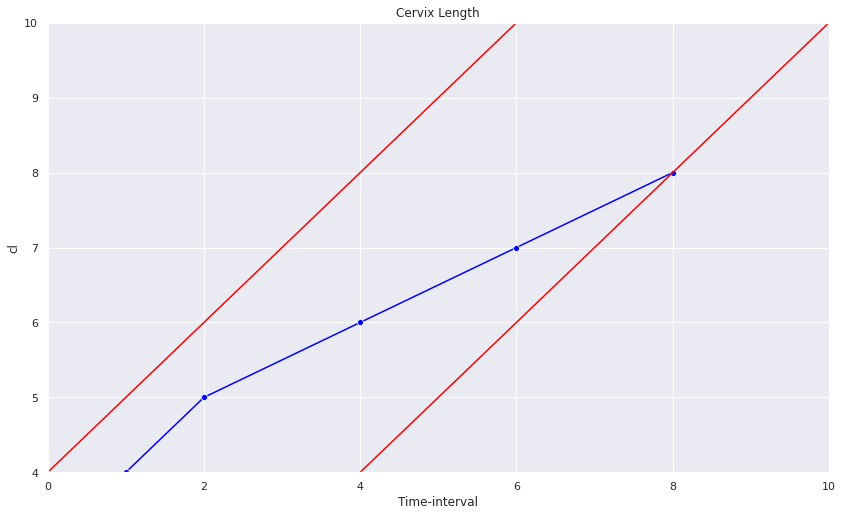

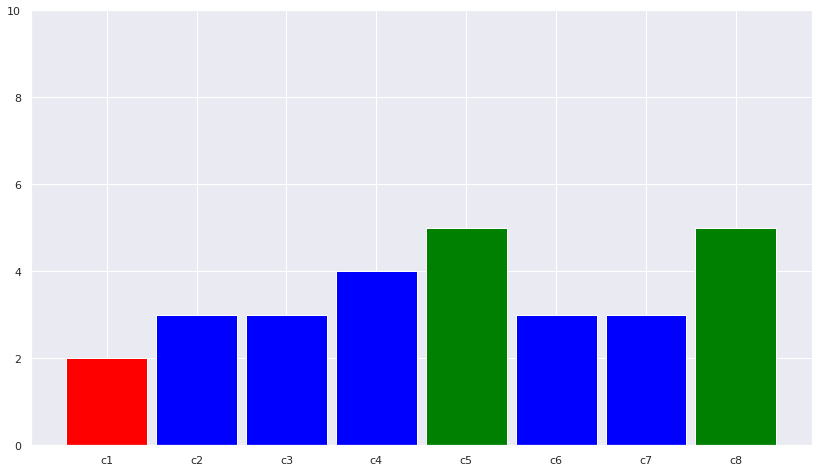

the outcome of this graph is : ['normal']


In [ ]:
#pulse & BP input
pulses = []
bp1 = int(input("enter bp 1:"))
bp11 = int(input("enter bp 2:"))
bp2 = int(input("enter bp 3:"))
bp22 =int(input("enter bp 4:"))

for i in range(1,9):
  r=int(input("enter pulse {} :".format(i)))
  if r>=60 and r<=120:
    pulses.append(r)
  else:
    print("consult")



#foetal heart rate graph
fhr_graph(Fhr1,Fhr2,Fhr3,Fhr4,Fhr5,Fhr6,Fhr7,Fhr8)


#cervix lenght graph

if cl1 >= 4:
  cl_graph(r)
else:
  print("Not a suitable time to draw partograph, Please Wait till Cervix Length is 4cm.")

#bp-pulse graph
bp_pred_list=pulses+[bp1]+[bp11]+[bp2]+[bp22]
if b=='consult':
  bp_pred=0
else:
  bp_pred=1

#Pulse graph

if len(pulses)<8:
  pass
else:
  bp_pulse_graph(pulses,bp1,bp11,bp2,bp22)




#contractions graph

left1 = [1, 2, 3, 4, 5, 6, 7, 8]

cont_graph(contractions,left1,time)


In [ ]:
temp1=float(input("enter temperature: "))
temp2=float(input("enter temperature: "))


enter temperature: 36.8
enter temperature: 37.3


In [ ]:
def temp_check(temp,temp_pred):
  if temp<36.7 or temp >37.6:
    temp_pred=0
  else:
    temp_pred=1

temp_pred=0
temp_check(temp1,temp_pred)
temp_check(temp2,temp_pred)


In [ ]:
final_list=[fhr_pred]+[flu_pred][0]+[cer_pred][0]+[cont_pred]+[bp_pred]+[bp_pred]+[temp_pred]

In [ ]:
final_list

[0, 1, 1, 1, 0, 0, 0]

In [ ]:
flu_pred=[0 if x=='b' or x=='m'  else 1 for x in fl]
cer_pred=[0 if r<4 else 1]

final_model.predict([final_list])[0]

'FD'